# Exemplo prático - FEV

O FEV, que é um acrônimo para volume expiratório forçado, é uma medida de quanto ar uma pessoa pode expirar (em litros) durante uma respiração forçada. 

Nesse conjunto de dados, foram medidos o VEF de 606 crianças, com idades entre 6 e 17 anos. O conjunto de dados também fornece informações adicionais sobre essas crianças: seus idade, seus altura, sexo, e o mais importante, se a criança é fumante ou não.

O objetivo geral deste experimento foi descobrir se fumar tem ou não um efeito sobre o FEV das crianças.

**Base:** https://raw.githubusercontent.com/GTPB/PSLS20/master/data/fev.txt

* idade: idade em anos
* fev: Volume expiratório forçado máximo em um segundo
* altura: Altura em polegadas
* sexo: 'masculino' ou 'feminino'
* fumante: 'fumante - 1' ou 'não fumante - 0'

# Importe as bibliotecas necessárias

In [2]:
import pandas as pd
import numpy as np
import plotly.express as px

# Leia o banco de dados

Visualize o cabeçalho da tabela

In [3]:
df = pd.read_csv('/content/fev.csv')
df.head()



,Age,FEV,Height,Gender,Smoke
0,9,1.708,57.0,F,0
1,8,1.724,67.5,F,0
2,7,1.720,54.5,F,0
3,9,1.558,53.0,M,0
4,9,1.895,57.0,M,0


### Renomeie as colunas para portugues usando a função rename

* 'Age': 'Idade',
* 'FEV': 'VEF', (Volume expiratório forçado)
* 'Height': 'Altura',
* 'Gender': 'Sexo',
* 'Smoke': 'Fumante'

In [4]:
df.rename(columns = {"Age": "idade",
                   'FEV': 'VEF',
                   'Height': 'Altura',
                   'Gender': 'Sexo',
                   'Smoke': 'Fumante'}, inplace = True)
df.head()

,idade,VEF,Altura,Sexo,Fumante
0,9,1.708,57.0,F,0
1,8,1.724,67.5,F,0
2,7,1.720,54.5,F,0
3,9,1.558,53.0,M,0
4,9,1.895,57.0,M,0


### Para facilitar a análise, transforme a altura de polegadas para cm. 
Basta multiplicar a coluna da altura por 2.54 

In [5]:
df['Altura'] = df['Altura'] * 2.54
df

,idade,VEF,Altura,Sexo,Fumante
0,9,1.708,144.78,F,0
1,8,1.724,171.45,F,0
2,7,1.720,138.43,F,0
3,9,1.558,134.62,M,0
4,9,1.895,144.78,M,0
...,...,...,...,...,...
601,16,4.872,182.88,M,1
602,16,4.270,170.18,M,1
603,15,3.727,172.72,M,1
604,16,2.795,160.02,F,1


# Passo 1: Identifique os tipos de dados e faça as análises iniciais

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606 entries, 0 to 605
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   idade    606 non-null    int64  
 1   VEF      606 non-null    float64
 2   Altura   606 non-null    float64
 3   Sexo     606 non-null    object 
 4   Fumante  606 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 23.8+ KB


### Qual o problema na leitura das variaveis? 
* Solucione o problema.

In [12]:
df['Fumante'] =  df['Fumante'].astype('object')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606 entries, 0 to 605
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   idade    606 non-null    int64  
 1   VEF      606 non-null    float64
 2   Altura   606 non-null    float64
 3   Sexo     606 non-null    object 
 4   Fumante  606 non-null    object 
dtypes: float64(2), int64(1), object(2)
memory usage: 23.8+ KB


### Esse banco de dados possui algum valor nulo?

In [7]:
df.isnull().sum()

idade      0
VEF        0
Altura     0
Sexo       0
Fumante    0
dtype: int64

### Qual a quantidade de linhas e colunas?

In [8]:
df.shape

(606, 5)

### Qual a quantidade de valores únicos em cada coluna?


In [9]:
df. nunique()

idade       12
VEF        534
Altura      52
Sexo         2
Fumante      2
dtype: int64

# Passo 2: Análise Univariada 

<div class="alert alert-block alert-info">
Agora vamos começar a entender como se comportam cada uma das váriaveis de forma individual.
</div>

# Quantas categorias nos temos nas variáveis categóricas? Qual é a categoria predominante em cada uma?

In [13]:
df.describe(include = 'object')

,Sexo,Fumante
count,606,606
unique,2,2
top,M,0
freq,314,545


### Plote um gráfico de barras para a variavel sexo 

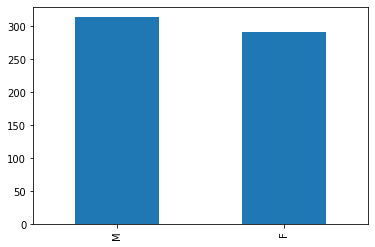

In [22]:

fig = df['Sexo'].value_counts().plot(kind = 'bar')


<function matplotlib.pyplot.show(*args, **kw)>

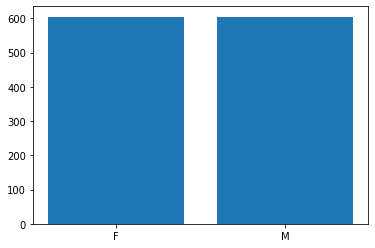

In [52]:
import matplotlib.pyplot as plt
ind = df['Sexo']
y = np.arange(len(ind))
plt.bar(df['Sexo'],y)
plt.show

In [24]:
import plotly.express as px
fig = px.histogram(df, x="Sexo", text_auto=True, color = 'Sexo')
fig.update_layout(bargap=0.2, title = 'Sexo das crianças - Estudo Vef')
fig.show()

# Faça um gráfico de frequencia para a idade. 

Quais são as idades mais presentes na nossa amostra?

In [57]:
fig = px.histogram(df, x="idade", text_auto=True)
fig.update_layout(bargap=0.2, title = 'Frequencia das idades na amostra')
fig.show()

# Qual o vef mais presente na amostra? 

### Voce pode identificar isso pelo histograma 

* A forma da distribuição do Vef é simétrica ou assimetrica? 

In [60]:
fig = px.histogram(df, x="VEF", text_auto=True)
fig.update_layout(bargap=0.2, title = 'Distribuição assimetrica')
fig.show()

![image.png](attachment:image.png)

# Faça uma análise descritiva das variaveis númericas

* Qual a idade média, mediana, mínima e maxima da nossa base?
* Qual a Altura média, mediana, mínima e maxima da nossa base?

In [69]:
df[['idade', 'Altura']].describe()

,idade,Altura
count,606.000000,606.000000
mean,10.145215,156.796380
std,2.551688,13.156718
min,6.000000,119.380000
25%,8.000000,147.320000
50%,10.000000,157.480000
75%,12.000000,166.370000
max,17.000000,187.960000


# Existe algum valor discrepante na variavel Vef? 

### Um jeito bem comum de representar os quartis que citei anteriormente é com o gráfico de boxplot.

<img src='Boxplot2.png' width=90%>



In [72]:
fig = px.box(df, y="VEF", title = 'Boxplot do Vef')
fig.show()

# Passo 3: Análise Bivariada/Multivariada 

<div class="alert alert-block alert-info">
Agora vamos começar a entender como se comportam as váriaveis de forma conjunta.
</div>

# <font color='#31d43c'>Análises conjunta de variáveis númericas</font>

* As variáveis númericas do nosso banco de dados estão correlacionadas? 


In [75]:

#correlação entre as variaveis numericas, excluindo as que não tenho interesse. 
corr = df.select_dtypes(include=['int64', 'float64']).drop(columns=['Altura']).corr() 

# ocultando valores repetidos na visualização abaixo
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
corr[mask] = np.nan

#visualização da correlação. 
(corr
 .style
 .background_gradient(cmap='coolwarm', axis=None, vmin=-1, vmax=1)
 .highlight_null(null_color='#f1f1f1')  # cor dos numeros nulos 
 .set_precision(2))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning:

this method is deprecated in favour of `Styler.format(precision=..)`



,idade,VEF
idade,nan,nan
VEF,0.73,nan


# Faça um gráfico de dispersão entre Altura e Vef

* O que podemos concluir através desse gráfico? 

In [77]:
fig = px.scatter(df,x= 'Altura', y="VEF", title = 'Graficos de dispersão')
fig.show()

# Faça um boxplot entre a variavel ser fumante ou não e o Vef

* Interprete o gráfico e veja se existe algum problema. 

In [84]:
fig = px.box(df,x= 'Fumante', y="VEF")
fig.show()

# Plote um boxplot entre Sexo e Vef

In [82]:
fig = px.box(df,x= 'Sexo', y="VEF",color = 'Sexo')
fig.show()

**Parece que as crianças que fumam têm um VEF médio mais alto do que as crianças que não fumam. Devemos mudar as legislações em todo o mundo e tornar o fumo obrigatório para as crianças?** 

Talvez haja algo mais acontecendo nos dados, agora vamos gerar um gráfico semelhante, mas vamos estratificar os dados com base na idade (idade como fator).


# Faça um boxplot considerando, Vef, fumante e idade 

* x = idade
* y =  Vef
* cor = Fumante

### O que podemos concluir? 

In [83]:
fig = px.box(df,x= 'idade', y="VEF",color = 'Fumante')
fig.show()

### Você sabia que podemos utilizar 4 variáveis ao mesmo tempo em um boxplot? 

É possível fazer isso utilizando o facet_row para adicionar mais uma variavel na análise. 
Tente fazer aí. Se precisar, busque no google facet_row plotly. 